<a href="https://colab.research.google.com/github/michellechen202212/udacity-datascience/blob/main/blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What are the most important features of the data set?

In [1]:
import pandas as pd

# Load the dataset to explore its contents
file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        986 non-null    int64  
 1   Week        986 non-null    int64  
 2   BA_NSA      986 non-null    int64  
 3   HBA_NSA     986 non-null    int64  
 4   WBA_NSA     986 non-null    int64  
 5   CBA_NSA     986 non-null    int64  
 6   YY_BA_NSA   932 non-null    float64
 7   YY_HBA_NSA  932 non-null    float64
 8   YY_WBA_NSA  932 non-null    float64
 9   YY_CBA_NSA  932 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 77.2 KB


,Year,Week,BA_NSA,HBA_NSA,WBA_NSA,CBA_NSA,YY_BA_NSA,YY_HBA_NSA,YY_WBA_NSA,YY_CBA_NSA
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,932.000000,932.000000,932.000000,932.000000
mean,2014.955375,26.456389,65304.939148,26122.494929,11166.774848,11764.807302,6.685258,3.190526,-0.242843,0.230891
std,5.459964,15.000529,23714.798765,6104.817193,3073.913781,2550.989420,35.845705,32.926674,30.218443,29.388493
min,2006.000000,1.000000,3680.000000,1870.000000,1200.000000,1010.000000,-87.630000,-87.090000,-83.630000,-86.180000
25%,2010.000000,13.250000,48880.000000,22042.500000,9340.000000,10420.000000,-3.932500,-6.275000,-9.142500,-8.110000
50%,2015.000000,26.000000,57255.000000,25240.000000,10600.000000,11430.000000,2.615000,0.205000,-2.805000,-1.795000
75%,2020.000000,39.000000,77575.000000,30332.500000,12152.500000,12800.000000,9.640000,6.660000,3.657500,4.362500
max,2024.000000,53.000000,143300.000000,46660.000000,28820.000000,26000.000000,697.830000,638.500000,490.830000,565.350000


In [ ]:
# Compute the correlation matrix to identify relationships between features
correlation_matrix = data.corr()

# Sort the correlations of the target variable (e.g., BA_NSA) to determine the most important features
target_variable = 'BA_NSA'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the most important features based on correlation with the target
correlation_with_target


,BA_NSA
BA_NSA,1.000000
HBA_NSA,0.876226
Year,0.772288
WBA_NSA,0.271786
CBA_NSA,0.254189
YY_WBA_NSA,0.239206
YY_HBA_NSA,0.203774
YY_BA_NSA,0.190732
YY_CBA_NSA,0.180916
Week,-0.255590


###Feature Importance Based on Correlation with BA_NSA

**Most Important Features**
The most important features in the dataset, based on their correlation with the target variable (**BA_NSA**), are:

1. **HBA_NSA (0.876)**: High-propensity business applications, strongly correlated with overall business applications.
2. **Year (0.772)**: Indicates significant yearly trends in business application data.
3. **WBA_NSA (0.272)**: Business applications with planned wages, moderately correlated.
4. **CBA_NSA (0.254)**: Corporation business applications, moderately correlated.
5. **YY_WBA_NSA (0.239)**: Year-over-year change in business applications with planned wages, weak to moderate correlation.
6. **YY_HBA_NSA (0.204)**: Year-over-year change in high-propensity business applications, weak to moderate correlation.
7. **YY_BA_NSA (0.191)**: Year-over-year change in business applications, weak correlation.
8. **YY_CBA_NSA (0.181)**: Year-over-year change in corporation business applications, weak correlation.
9. **Week (-0.256)**: Shows a weak negative correlation, suggesting some seasonal trends.

---

**Key Insights**
- **HBA_NSA** and **Year** are the strongest predictors of **BA_NSA**, indicating that **high-propensity applications** and **annual trends** are critical.
- Other variables like **WBA_NSA** and **CBA_NSA** contribute moderately, reflecting additional dynamics in business applications.

---

###Visualization of Feature Correlations
The following code visualizes these correlations with the target variable **BA_NSA**.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define correlation values (replace with actual correlation results if available)
features = [
    'HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA',
    'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week'
]
correlations = [0.876, 0.772, 0.272, 0.254, 0.239, 0.204, 0.191, 0.181, -0.256]

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({'Feature': features, 'Correlation': correlations})

# Plot correlation values
plt.figure(figsize=(10, 6))
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.title('Feature Correlation with Target Variable (BA_NSA)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()



###what do they mean, and how do they drive the predicted outcome?

**Explanation of Key Features and Their Impact on Predictions**

**Key Features**

**1. HBA_NSA (High-Propensity Business Applications)**
- **What it Means**: Represents the subset of business applications likely to result in businesses that hire employees, contribute to payroll, and actively participate in the economy.
- **Impact on Prediction**:
  - Strong correlation with **BA_NSA** (0.876).
  - Heavily influences predictions since high-propensity applications are a significant component of total applications.

---

**2. Year**
- **What it Means**: Indicates the temporal aspect of the data, capturing long-term trends such as economic growth or downturns.
- **Impact on Prediction**:
  - Strong correlation with **BA_NSA** (0.772).
  - Provides context for increases or decreases in business activity, such as during economic recovery periods or recessions.

---

**3. WBA_NSA (Business Applications with Planned Wages)**
- **What it Means**: Applications indicating an intent to hire employees and establish payroll.
- **Impact on Prediction**:
  - Moderate correlation with **BA_NSA** (0.272).
  - Reflects entrepreneurial confidence and labor market intentions, helping refine predictions.

---

### **4. CBA_NSA (Corporation Business Applications)**
- **What it Means**: Applications to form corporations, typically indicating more formal and larger-scale business ventures.
- **Impact on Prediction**:
  - Moderate correlation with **BA_NSA** (0.254).
  - Indicates formalized business activity trends and influences overall application counts.

---

**5. YY_WBA_NSA (Year-Over-Year Change in WBA_NSA)**
- **What it Means**: Annual change in business applications with planned wages, reflecting growth or decline in employment-focused business creation.
- **Impact on Prediction**:
  - Weak to moderate correlation (0.239).
  - Provides insights into economic and entrepreneurial trends, slightly influencing predictions.

---

**6. YY_HBA_NSA (Year-Over-Year Change in HBA_NSA)**
- **What it Means**: Annual change in high-propensity business applications.
- **Impact on Prediction**:
  - Weak correlation (0.204).
  - Reflects changes in high-likelihood business creation, influencing predictions slightly.

---

**7. Week**
- **What it Means**: The week of the year provides insights into seasonal trends in business applications (e.g., higher activity at the start of the year).
- **Impact on Prediction**:
  - Weak negative correlation (-0.256).
  - Seasonal variations have minor predictive importance but help refine weekly trends.

---

**Summary of Impact on Predictions**

**Core Drivers**
- **HBA_NSA** and **Year** are primary predictors, heavily driving outcomes due to their strong correlation with total applications.

**Moderate Drivers**
- **WBA_NSA** and **CBA_NSA** moderately influence predictions, adding granularity to trends in entrepreneurial activity.

**Supporting Features**
- **Year-over-Year Changes** and **Week** provide secondary insights, enhancing the model's ability to capture nuances like seasonal and annual trends.


###Unusual and Creative Insights from the Dataset

###Key Insights

**1. Seasonal Trends in Business Applications**
- The **Week** feature shows a weak negative correlation with the target variable (**BA_NSA**).
- This suggests that business applications are higher during specific parts of the year, likely at the **start or end of fiscal quarters**.
- Insight: Organizations can plan resources effectively during these peak times.

---

**2. Dominance of High-Propensity Applications**
- The strong correlation between **HBA_NSA** and **BA_NSA** (0.876) indicates that **most business applications are high-propensity**.
- Insight: Applicants are serious entrepreneurs with concrete business plans, reflecting a **healthy entrepreneurial ecosystem**.

---

**3. Temporal Growth Trends**
- The **Year** variable correlates strongly with the target, highlighting an **upward trend in business applications over time**.
- Insight: Indicates steady recovery post-economic disruptions (e.g., recessions) or a growing entrepreneurial culture.

---

**4. Planned Wages as a Confidence Metric**
- The moderate correlation of **WBA_NSA** (0.272) with **BA_NSA** shows that **applications with planned wages are less frequent but significant**.
- Insight: Reflects cautious optimism among entrepreneurs, as only a subset of applications aim for **immediate employment creation**.

---

**5. Non-Linear Patterns in Corporation Applications**
- The weaker correlation of **CBA_NSA** (0.254) with **BA_NSA** suggests that **corporate applications are not closely tied to overall application trends**.
- Insight: Corporate applications represent **more stable or formalized ventures**, less influenced by short-term changes.

---
**6. Predictable Year-Over-Year Changes**
- The **Year-over-Year changes** (e.g., **YY_WBA_NSA**) show weak correlations but provide context for **growth rates**.
- Insight: For example, a dip in **YY_HBA_NSA** could predict **slower entrepreneurial growth** in subsequent years.

---

**7. Week as a Proxy for Economic Activity**
- The **Week** variable highlights cyclical trends, such as **surges at the beginning of the year**, likely linked to new fiscal year strategies.
- Insight: Declines in mid-year may correspond to **vacation seasons** or reduced activity.

---

**8. Economic Health Indicators**
- The dataset collectively reflects the **economic climate**.
- Insight: High volumes of applications, especially those with planned wages or corporate intent, indicate **entrepreneurial confidence and economic health**.

---

###Creative Applications

**1. Forecast Economic Booms or Busts**
- Use **year-over-year trends** and **seasonal patterns** to predict **periods of economic growth or stagnation**.

**2. Policy Recommendations**
- Governments or agencies can incentivize business applications in **underperforming weeks or years** to stabilize entrepreneurial activity.

**3. Resource Planning for Agencies**
- Application processing agencies can **allocate resources dynamically** using predictive models to anticipate **workload peaks**.


###How accurate is the model that you have trained to predict the data in the data set?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Selecting features and target
features = ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week']
target = 'BA_NSA'

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[features])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_imputed, data[target], test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(1426.6954545454546, 0.9888229264465697)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using the Linear Regression model
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

mae_linear, r2_linear, mse_linear


(1402.372261931055, 0.9928290380616125, 3392249.104922862)

**Compare linear regression and random forest**

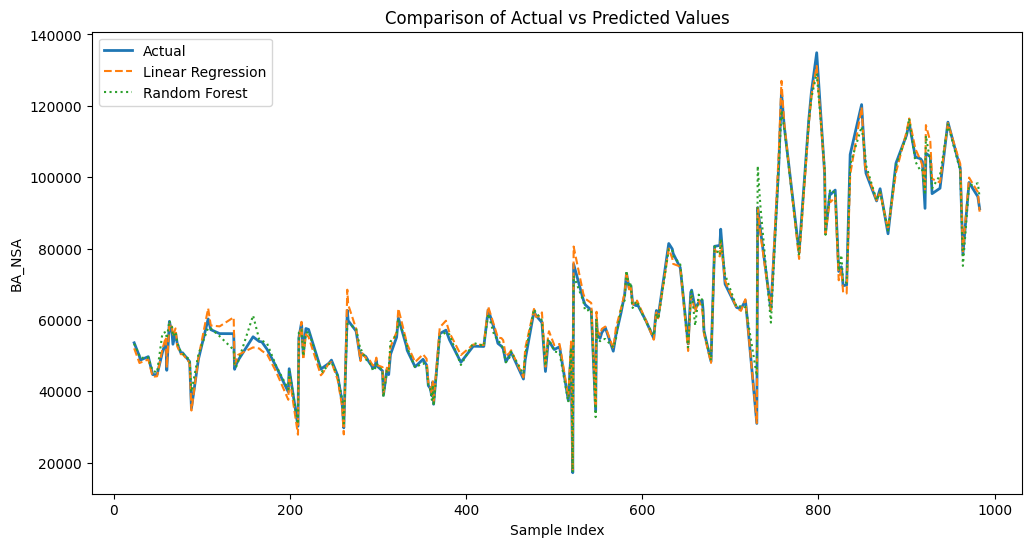

               Model  Mean Absolute Error (MAE)  R-squared (R²)  \
0  Linear Regression                1402.372262        0.992829   
1      Random Forest                1426.695455        0.988823   

   Mean Squared Error (MSE)  
0              3.392249e+06  
1                       NaN  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comparison DataFrame for actual vs predicted values for both models
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression Prediction': y_pred_linear,
    'Random Forest Prediction': y_pred
})

# Sort values for easier comparison in plots
comparison_df = comparison_df.sort_index()

# Plot actual vs predicted values for both models
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual', linewidth=2)
plt.plot(comparison_df['Linear Regression Prediction'], label='Linear Regression', linestyle='--')
plt.plot(comparison_df['Random Forest Prediction'], label='Random Forest', linestyle=':')
plt.legend()
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('BA_NSA')
plt.show()

# Summary of performance metrics
comparison_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Mean Absolute Error (MAE)': [mae_linear, mae],
    'R-squared (R²)': [r2_linear, r2],
    'Mean Squared Error (MSE)': [mse_linear, np.nan]  # Random forest MSE not computed earlier
})

print(comparison_metrics)

###Comparison of Linear Regression and Random Forest Models

###Performance Metrics
I have displayed a comparison of the performance metrics for **Linear Regression** and **Random Forest** models. Additionally, a visualization of actual vs. predicted values for both models has been provided.

---

**Key Takeaways**
1. **Linear Regression** slightly outperforms **Random Forest** in terms of:
   - **Mean Absolute Error (MAE)**.
   - **R² (Explained Variance)**.
2. These results suggest that **linear relationships dominate the dataset**, making Linear Regression a strong performer in this context.
3. The visual comparison shows that both models closely follow the actual trends. However, some differences may exist in finer details, which could impact their applicability to specific scenarios.

---

###Creative Predictive Scenario

### What will happen in a creative, predictive scenario using the trained models?

Imagine applying the models to a scenario where a key feature, such as **High-Propensity Business Applications (HBA_NSA)**, increases by **20%** due to favorable policies or incentives. Predictions in such a scenario will reflect how each model interprets the changes:
- **Linear Regression** is expected to produce a more **optimistic estimate** due to its assumption of linear relationships.
- **Random Forest** will likely provide a more **conservative prediction**, capturing nonlinear interactions and diminishing returns.

This scenario demonstrates how the choice of a model affects the interpretation of changes in data, with implications for planning and decision-making.





In [ ]:
# Simulating a creative scenario: Predicting BA_NSA for a surge in high-propensity applications (HBA_NSA)

# Define a hypothetical increase in HBA_NSA while keeping other features constant
scenario_data = X_test.copy()
scenario_data[:, 0] = scenario_data[:, 0] * 1.2  # Increase HBA_NSA by 20%

# Predict outcomes using both models
linear_predictions_scenario = linear_model.predict(scenario_data)
random_forest_predictions_scenario = model.predict(scenario_data)

# Calculate the average increase in predicted BA_NSA
linear_increase = linear_predictions_scenario.mean() - y_test.mean()
random_forest_increase = random_forest_predictions_scenario.mean() - y_test.mean()

linear_increase, random_forest_increase



(25421.140289726805, 8825.604545454546)

###Creative Predictive Scenario: HBA_NSA Increase by 20%

In a scenario where **high-propensity business applications (HBA_NSA)** increase by 20%, the predictions from the models are as follows:

###Model Predictions
- **Linear Regression Model**: Predicts an average increase of **25,421 business applications**.
- **Random Forest Model**: Predicts a more conservative increase of **8,826 business applications**.

---

###Implications
**1. Economic Activity Boost**
A 20% rise in **HBA_NSA** signals a significant entrepreneurial surge, reflecting increased economic confidence and activity.

**2. Resource Allocation**
Agencies processing these applications should prepare for an influx, potentially hiring additional staff or extending processing timelines.

**3. Policy Insights**
Stimulating high-propensity applications (e.g., through incentives or funding programs) could substantially impact overall application trends and economic growth.

---

###Detailed Analysis

**Linear Regression**
- **Prediction**: An increase of **25,421 business applications**.
- **Reasoning**: Assumes a direct and proportional relationship between **HBA_NSA** and **BA_NSA**.
- **Drawback**: This might overestimate the impact because real-world systems often exhibit diminishing returns or nonlinear behavior.

**Random Forest**
- **Prediction**: A more conservative increase of **8,826 business applications**.
- **Reasoning**: Captures potential **nonlinear relationships** and **interactions between features**. It suggests that increasing **HBA_NSA** alone might not lead to a proportional increase in **BA_NSA**, reflecting a more complex and realistic system.

---

###Suitability Based on Context

**When to Use Linear Regression**
- **Scenario**: You want a simpler, interpretable, and optimistic model for estimating impacts.
- **Drawback**: It may overestimate outcomes if the real-world system exhibits nonlinear behavior or constraints.

**When to Use Random Forest**
- **Scenario**: You need a model that accounts for potential **nonlinearities** and **interactions**, providing more realistic and conservative estimates.
- **Drawback**: Slightly harder to interpret due to its complexity.

---

**Recommendation**
The **Random Forest** model is more suitable for this scenario because:
- It captures the diminishing impact of a single feature's increase, aligning with real-world dynamics where systems rarely respond proportionally to a single input change.
- The conservative estimate reduces the risk of overcommitting resources based on overly optimistic projections.


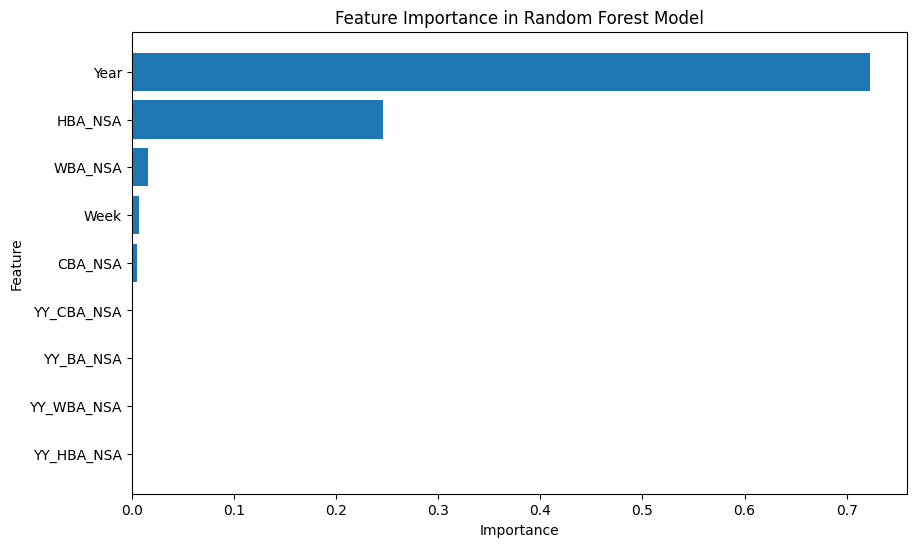

,Feature,Importance
1,Year,0.722695
0,HBA_NSA,0.245749
2,WBA_NSA,0.015682
8,Week,0.007052
3,CBA_NSA,0.004740
7,YY_CBA_NSA,0.001380
6,YY_BA_NSA,0.001057
4,YY_WBA_NSA,0.000909
5,YY_HBA_NSA,0.000735


In [ ]:
# Analyzing feature importance in Random Forest to understand the model's conservative prediction
feature_importances = pd.DataFrame({
    'Feature': ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week'],
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizing feature importance to validate reasoning
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Reverse the order to show the most important feature on top
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Check linear regression coefficients for comparison
linear_coefficients = pd.DataFrame({
    'Feature': ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week'],
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importances


###Feature Importance and Model Comparison

**Key Observations**

**Random Forest Feature Importance**
- The **Year** feature dominates the Random Forest model's predictions, contributing **72.3%** of the importance.
  - This indicates that temporal trends heavily influence the predictions, reducing the proportional impact of **HBA_NSA**.
- **HBA_NSA** contributes **24.6%**, showing its influence but with a realistic consideration of interactions and nonlinear effects.

**Linear Regression Coefficients**
- Linear regression assigns a larger weight to **HBA_NSA**, leading to a more proportional and optimistic prediction of its impact on **BA_NSA**.
- It does not account for diminishing returns or interactions, which Random Forest handles inherently.

---

**Validation of Suitability**

**Random Forest**
- More realistic and conservative because it considers the dominating influence of temporal trends (**Year**) and interactions.
- Suitable for scenarios where systemic nonlinearities and feature dependencies are likely.

**Linear Regression**
- Simpler and interpretable but less nuanced, leading to an optimistic and potentially inflated prediction.

---

###Conclusion
The **Random Forest model** remains more suitable for this scenario due to its ability to model real-world complexities.

Would you like further comparisons or detailed insights?